[-0.00000000e+00 -1.75776142e-01 -3.44700536e-01  3.71111636e-02
  5.89871401e-03  2.30402511e-04 -3.05038160e-05 -1.11880081e-05]


C:\Users\ardui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.6905251040008, tolerance: 0.19935871396971427
  positive)


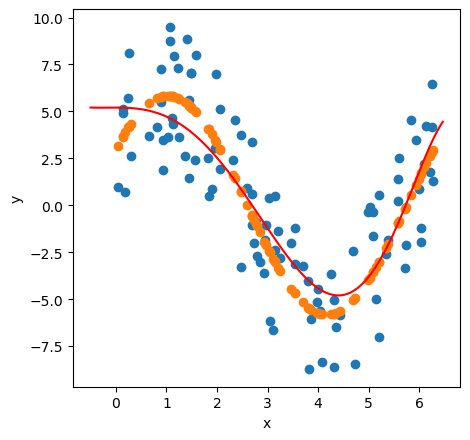

In [50]:
#5sin + 3cos関数の回帰問題(Lasso回帰)
import math
import random
import numpy as np
import matplotlib.pyplot as plt
# 多項式回帰
from sklearn.preprocessing import PolynomialFeatures
# Lasso回帰
from sklearn.linear_model import Lasso

x_list = []
for i in range(0,101):
    x_list.append(random.random() * math.pi * 2)

y_list      = []
y_list_true = []
for x in x_list:
    y_list.append(5 * math.sin(x) + 3 * math.cos(x)+ (random.random() * 8.0 - 4.0))
    y_list_true.append(5 * math.sin(x) + 3 * math.cos(x))

pf = PolynomialFeatures(degree = 8, include_bias = False)
#説明変数を指定した次数分増やす
x_train = pf.fit_transform(np.array([x_list]).T)

# Lasso回帰
lasso= Lasso(alpha=1.0)  
lasso.fit(x_train, np.array([y_list]).T)
print(lasso.coef_)

#訓練した回帰線を描くための処理===
line = np.linspace(-0.5,6.5,200,endpoint = False).reshape(-1, 1)
line_poly = pf.transform(line)
# Graph描画
fig = plt.figure(figsize=(5, 5),dpi = 100)
plt.scatter(x_list,y_list,label="Train")
plt.scatter(x_list,y_list_true,label="True")
plt.plot(line,lasso.predict(line_poly), color='red' )
plt.xlabel("x")
plt.ylabel("y")
plt.show()